In [56]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
schools_df = pd.read_csv('schools.csv')

pop_df = pd.read_csv('pop.csv')

schools_df['Neighborhood'] = schools_df[['neighborhood']]

schools_df = schools_df[['Neighborhood', 'total_students_enrolled']]
pop_df = pop_df[['Neighborhood', '2020_Total_Population']]

df = pd.merge(schools_df, pop_df, on='Neighborhood')

df['percent_students_per_capita'] = df['total_students_enrolled'] / df['2020_Total_Population']*100

df = df.sort_values(by='percent_students_per_capita', ascending=False)

display(df)

,Neighborhood,total_students_enrolled,2020_Total_Population,percent_students_per_capita
49,Northview Heights,527.0,1769,29.790842
34,Homewood North,589.0,2617,22.506687
35,Homewood South,477.0,2260,21.106195
22,East Hills,569.0,2892,19.674965
36,Homewood West,118.0,642,18.380062
...,...,...,...,...
76,West Oakland,51.0,2534,2.012628
62,South Side Flats,109.0,7467,1.459756
59,Shadyside,217.0,15317,1.416727
8,Bluff,40.0,5882,0.680041


Text(0.5, 1.0, 'Percent of Students per Capita by Neighborhood')

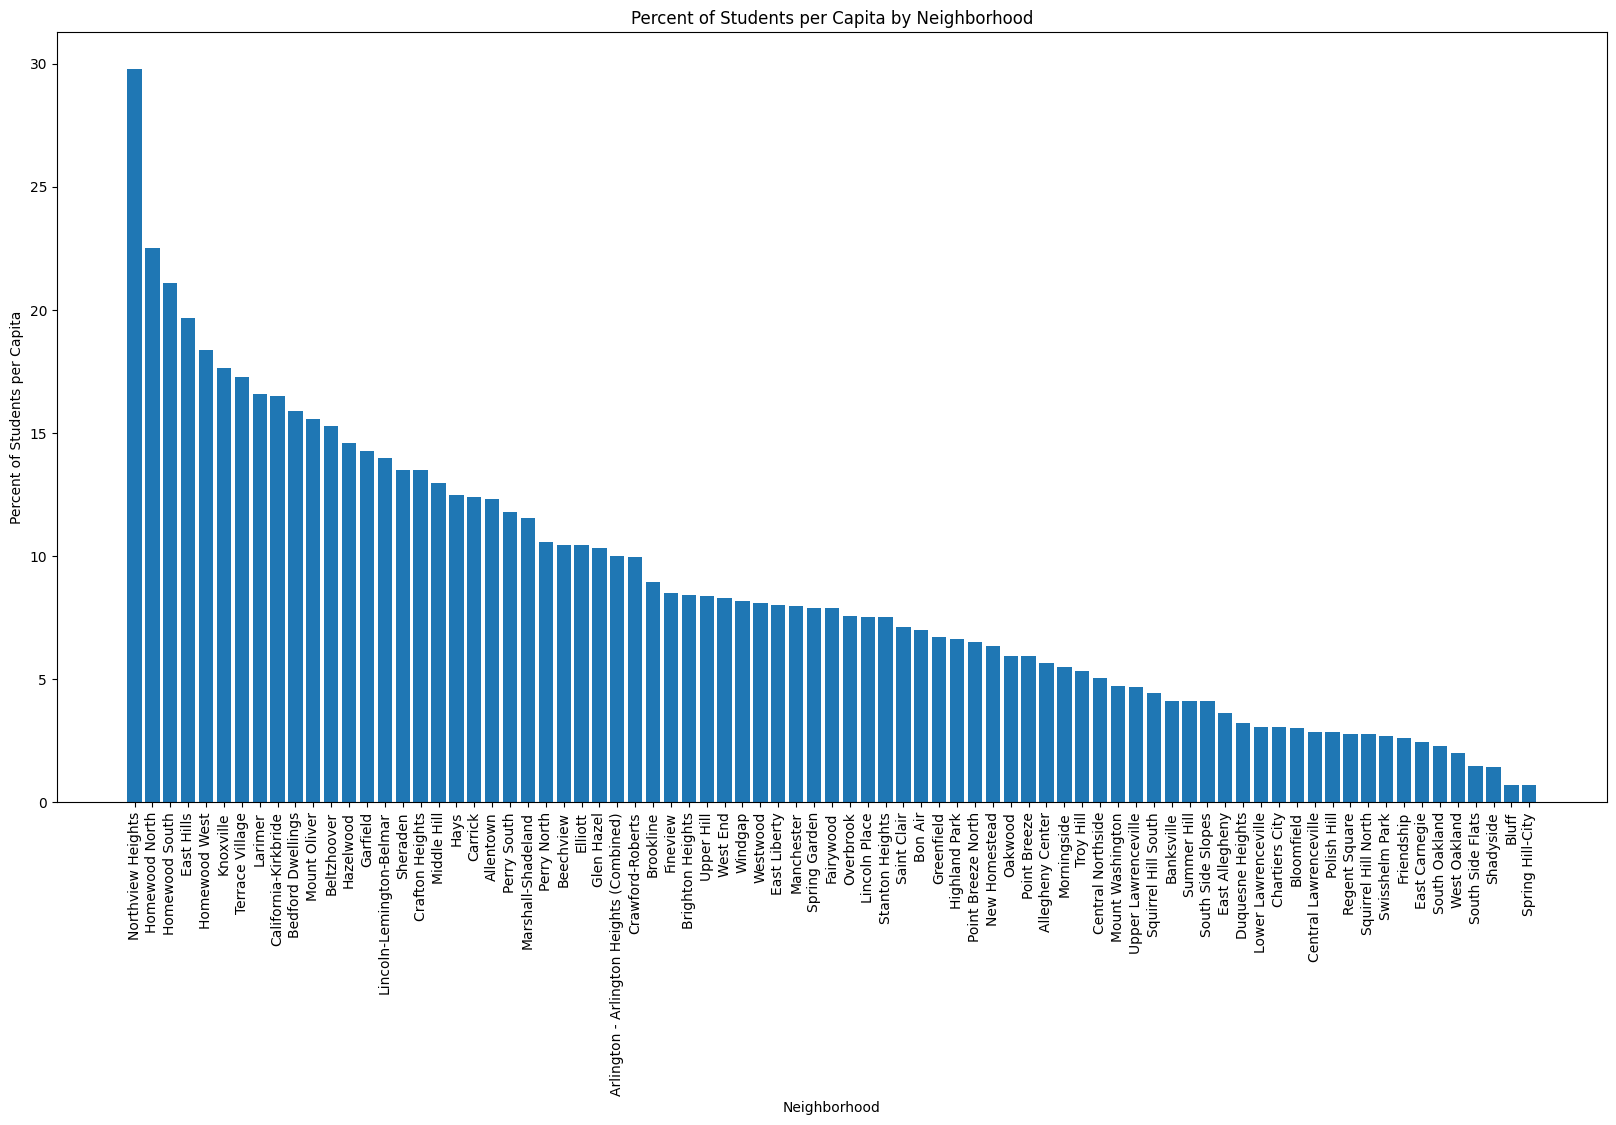

In [59]:
plt.figure(figsize=(20,10))
plt.bar(df['Neighborhood'], df['percent_students_per_capita'])
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Percent of Students per Capita')
plt.title('Percent of Students per Capita by Neighborhood')

### In this submetric, it's assumed that neighborhoods with more student enrollment per capita are more desirable since, it correlates with more families with children living in the neighborhood and a higher level of education in the neighborhood.